Importing dependencies

In [1]:
import tradingeconomics as te

import matplotlib.pyplot as plt

import os
os.chdir('..')
from helper import get_api_key

API login

In [ ]:
te.login(get_api_key())

Importing data

In [3]:
population_in_cities = te.getWBIndicator(series_code='EN.URB.MCTY.TL.ZS', output_type='df')

data = te.getIndicatorData(country='all', indicators=['coronavirus cases', 'population'], output_type='df')
covid_cases = data[data['Category']=='Coronavirus Cases']
population = data[data['Category']=='Population']

Data manipulation

In [4]:
population_in_cities = population_in_cities[['country', 'last']].rename(columns={'country': 'Country', 'last': 'Population in big cities (% of total)'}).set_index('Country')
covid_cases = covid_cases[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Cases'}).set_index('Country')
population = population[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Population'}).set_index('Country')

df = covid_cases.join(population_in_cities).join(population)
df['Cases per 1.000 people'] = df['Cases']/(df['Population']*1000)
df = df[['Cases per 1.000 people', 'Population in big cities (% of total)']]

df.sort_values(['Cases per 1.000 people', 'Population in big cities (% of total)'], ascending=False, inplace=True)
df.drop('World', inplace=True)
df = df.dropna().head(30)
df

,Cases per 1.000 people,Population in big cities (% of total)
Country,,
Czech Republic,56.404869,12.17282
Georgia,54.131183,28.95794
Belgium,53.669983,27.01655
United States,51.542491,46.48654
Armenia,50.973737,36.62683
Panama,46.679384,42.89931
Switzerland,45.995082,16.12967
Serbia,40.603592,20.06799
Israel,39.656940,57.85522


Plotting

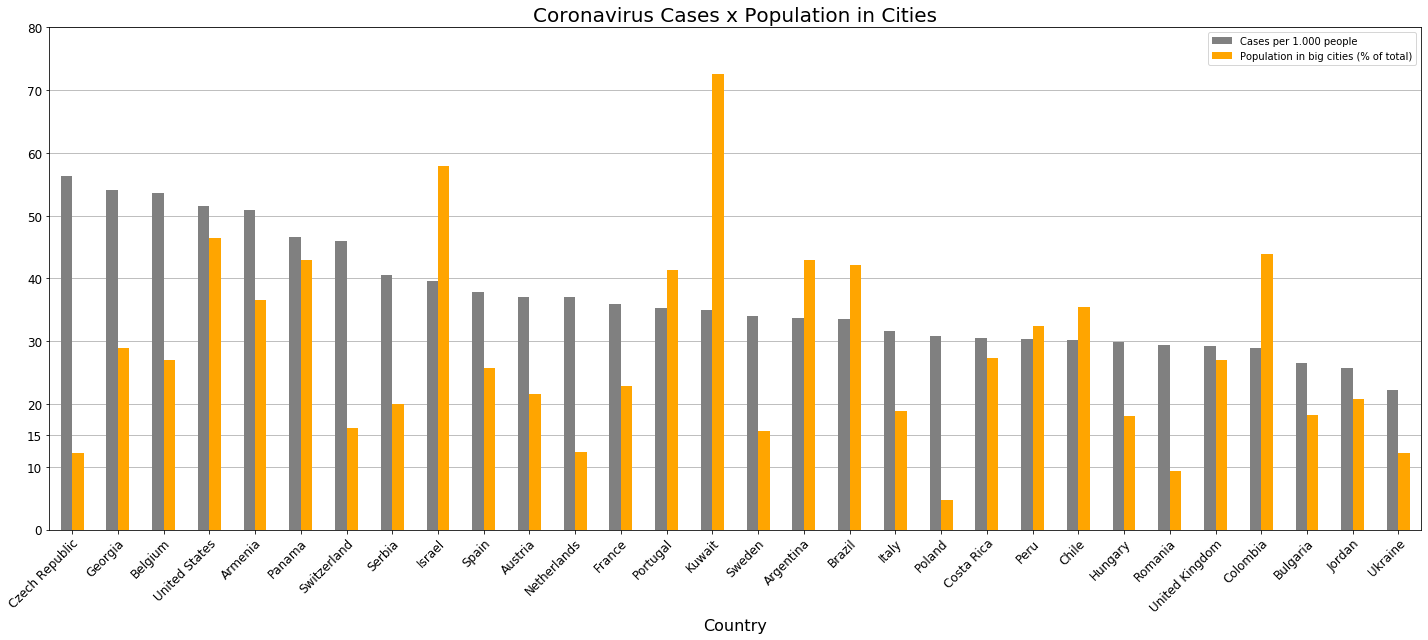

In [5]:
color_dict = {'Population in big cities (% of total)': 'orange', 'Cases per 1.000 people': 'grey'}

df.plot(
    figsize=(20, 9),
    kind='bar',
    zorder=3,
    color=[color_dict.get(x, '#333333') for x in df.columns],
    fontsize=12
)

ax = plt.gca()

plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    rotation_mode='anchor',
    fontsize=12
)

plt.yticks(list(plt.yticks()[0]) + [15])
ax.yaxis.grid(zorder=0)
ax.set_title('Coronavirus Cases x Population in Cities', color='black', size=20)
plt.xlabel('Country', fontsize=16)
plt.tight_layout()